# Bagging based Decision Tree Project 

For this project we will be exploring publicly available data from LendingClub.com. Lending Club connects people who need money (borrowers) with people who have money (investors). Hopefully, as an investor you would want to invest in people who showed a profile of having a high probability of paying you back. We will try to create a model that will help predict this.

Here are what the columns represent:

    credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
    purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase",  "small_business", and "all_other").
    int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
    installment: The monthly installments owed by the borrower if the loan is funded.
    log.annual.inc: The natural log of the self-reported annual income of the borrower.
    dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
    fico: The FICO credit score of the borrower.
    days.with.cr.line: The number of days the borrower has had a credit line.
    revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
    revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
    inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
    delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
    pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).


In [3]:
# libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
loans = pd.read_csv("loan_data.csv")

In [6]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [8]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


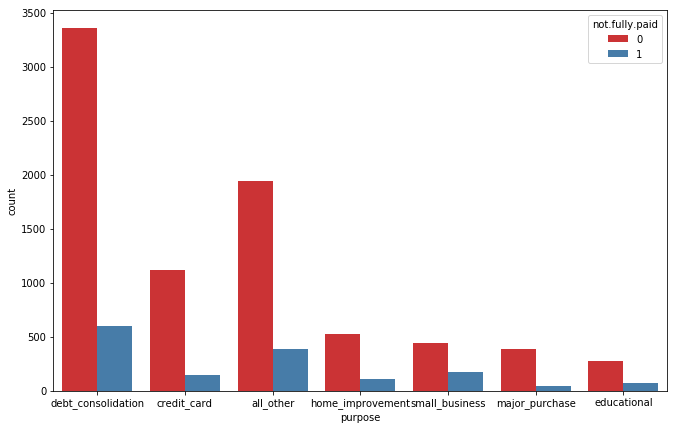

In [9]:
plt.figure(figsize=(11,7))
sns.countplot(x='purpose',hue='not.fully.paid',data=loans,palette='Set1')

In [10]:
cat_feats = ['purpose']

In [11]:
final_data = pd.get_dummies(loans,columns=cat_feats,drop_first=True)

In [12]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
credit.policy                 9578 non-null int64
int.rate                      9578 non-null float64
installment                   9578 non-null float64
log.annual.inc                9578 non-null float64
dti                           9578 non-null float64
fico                          9578 non-null int64
days.with.cr.line             9578 non-null float64
revol.bal                     9578 non-null int64
revol.util                    9578 non-null float64
inq.last.6mths                9578 non-null int64
delinq.2yrs                   9578 non-null int64
pub.rec                       9578 non-null int64
not.fully.paid                9578 non-null int64
purpose_credit_card           9578 non-null uint8
purpose_debt_consolidation    9578 non-null uint8
purpose_educational           9578 non-null uint8
purpose_home_improvement      9578 non-null uint8
purpose_major_purchase        9

In [13]:
#seed = 7
#kfold = model_selection.KFold(n_splits=10, random_state=seed)
#cart = DecisionTreeClassifier()
#num_trees = 100
#model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
#results = model_selection.cross_val_score(model, X, Y, cv=kfold)
#print(results.mean())

In [22]:
X = final_data.drop('not.fully.paid',axis=1)
y = final_data['not.fully.paid']

In [23]:
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [24]:
kfold = model_selection.KFold(n_splits=10,random_state=7)

In [25]:
dtree = DecisionTreeClassifier()

In [26]:
model = BaggingClassifier(base_estimator=dtree,n_estimators=100,random_state=7)

In [27]:
result = model_selection.cross_val_score(model,X,y,cv = kfold)

In [28]:
print(result.mean())

0.828532972079153
